## **`Importing Libraries`**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **`Importing Data`**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/archive (2)/NIFTY50_all.csv')

In [ ]:
df.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.0,770.0,1050.00,770.0,959.0,962.9,984.72,27294366,2.687719e+15,0.0,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.9,984.0,990.00,874.0,885.0,893.9,941.38,4581338,4.312765e+14,0.0,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.9,909.0,914.75,841.0,887.0,884.2,888.09,5124121,4.550658e+14,0.0,1069678.0,0.2088


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

In [ ]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [ ]:
df['Symbol'].unique()

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH', 'INFY',
       'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'LT',
       'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID',
       'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO', 'TATAMOTORS',
       'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEETELE',
       'ZEEL'], dtype=object)

## **`Data Cleaning`**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])                                                #changing the datatype for Date.

In [ ]:
df.isnull().sum()                                                                      #checking for null values.

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
df.fillna(0,inplace = True)

## **1. Ranking overall, by Industry and by single title (top 5), using mean Volume (and Trades)**

In [ ]:
rankings = df.groupby(by = ['Symbol']).agg({'Volume':'mean','Trades':'mean'}).sort_values(by = 'Volume', ascending = False).head(5)
rankings

,Volume,Trades
Symbol,,
VEDL,1.564060e+07,79301.257085
TATAMOTORS,1.247240e+07,73240.906199
SBIN,1.003930e+07,69756.124576
HINDALCO,9.282843e+06,43971.254207
ICICIBANK,8.224631e+06,64046.530908


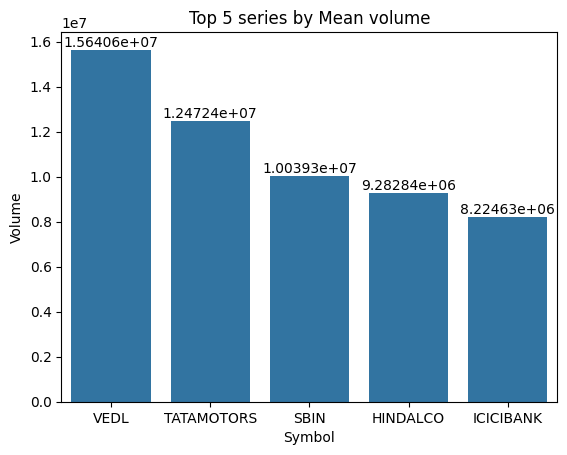

In [ ]:
ax = sns.barplot(data = rankings, x = 'Symbol' , y = 'Volume')
ax.bar_label(ax.containers[0])
plt.title('Top 5 series by Mean volume');

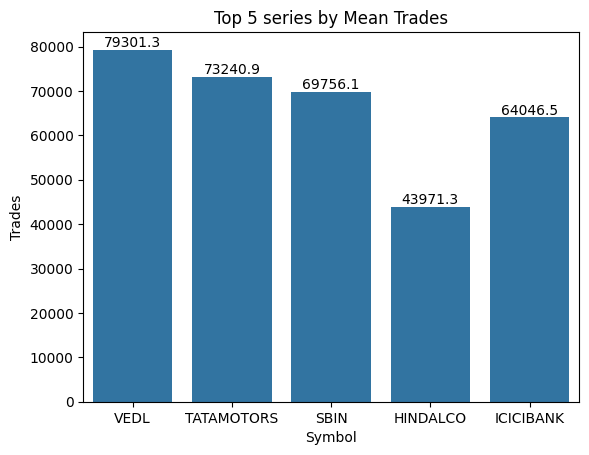

In [ ]:
bx = sns.barplot(data = rankings, x = 'Symbol' , y = 'Trades')
bx.bar_label(bx.containers[0])
plt.title('Top 5 series by Mean Trades');

### **Inference**
The top 5 industries using Mean, Volume and Trades are **VEDL, TATA MOTARS,SBIN, HINDAL CO AND ICICI BANK.**

## **2. Ranking of Must trading stock Since Inception (using Trades)**


In [ ]:
rank_trades = df.groupby('Symbol').agg({'Trades': ['mean', 'sum']}).sort_values(by=('Trades', 'sum'), ascending=False).head(5)

In [ ]:
rank_trades

Trades             
                    mean          sum
Symbol                               
SBIN        69756.124576  370125997.0
RELIANCE    67223.229175  356686454.0
ICICIBANK   64046.530908  339830893.0
TATAMOTORS  73240.906199  315448583.0
AXISBANK    87271.385091  296199081.0

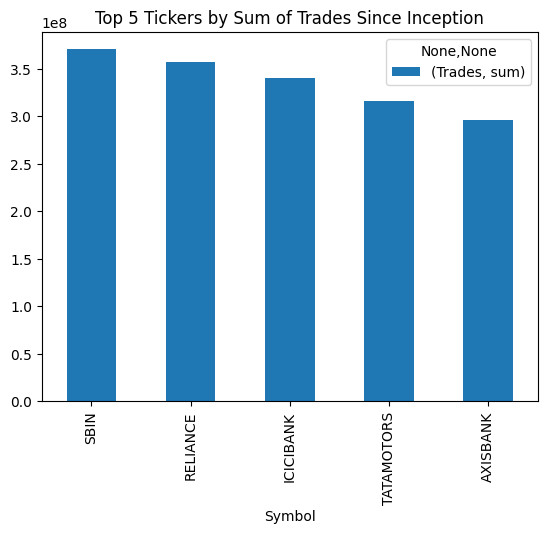

In [ ]:
rank_trades.plot(kind='bar', y=('Trades', 'sum'), title='Top 5 Tickers by Sum of Trades Since Inception');

## **Inference**
The top 5 industries using Trades since inception are **SBIN, RELIANCE, ICICI BANK, TATA MOTARS AND AXIS BANK.**

## **3. Top 5 best stocks using delta price % Since Inception**

In [ ]:
stocks = df.groupby('Symbol')['Close'].agg(['first','last'])                                      #initial,final

In [ ]:
stocks['delta_price'] = ( (stocks['last'] - stocks['first']) / stocks['last']) * 100

In [ ]:
best_stocks = stocks.sort_values(by = 'delta_price' ,ascending = False).head(5)

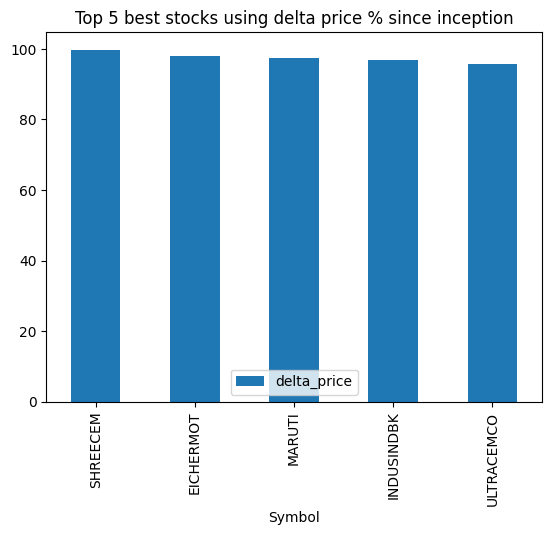

In [ ]:
best_stocks.plot(kind='bar', y=('delta_price'), title='Top 5 best stocks using delta price % since inception');

## **Inference**
The top 5 best stocks using delta price % since inception are  **SHREECEM, ECHERMOT, MARUTI, INDUSINDBK AND ULTRACEMCO.**

## **4. Top 5 worst stocks using delta price % Since Inception**

In [ ]:
worst_stocks = stocks.sort_values(by = 'delta_price' ,ascending = False).tail(5)

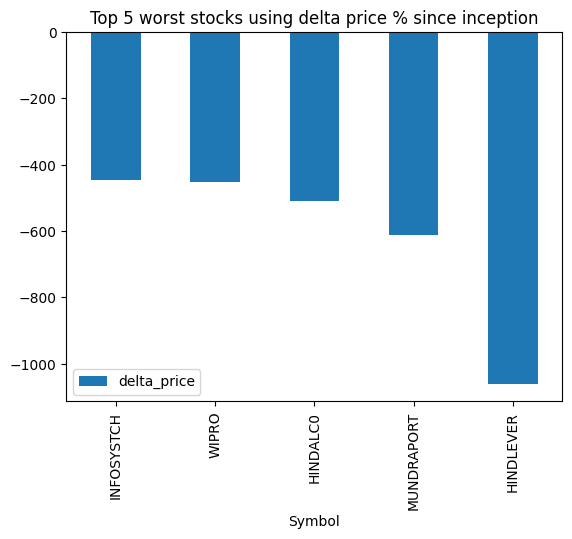

In [ ]:
worst_stocks.plot(kind = 'bar', y = ('delta_price'), title = 'Top 5 worst stocks using delta price % since inception');

## **Inference**
The top 5 worst stock using delta price % since inception are  **INFOSYSTCH, WIPRO, HINDAL CO, MUNDRAPORT AND HINDLEVER.**

## **5. Calculate Standard deviation and Coefficent of Variation**

In [ ]:
stand_deviation = df.groupby('Symbol')['Close'].std()
mean_stock = df.groupby('Symbol')['Close'].mean()

Coefficient_of_variation = stand_deviation/mean_stock

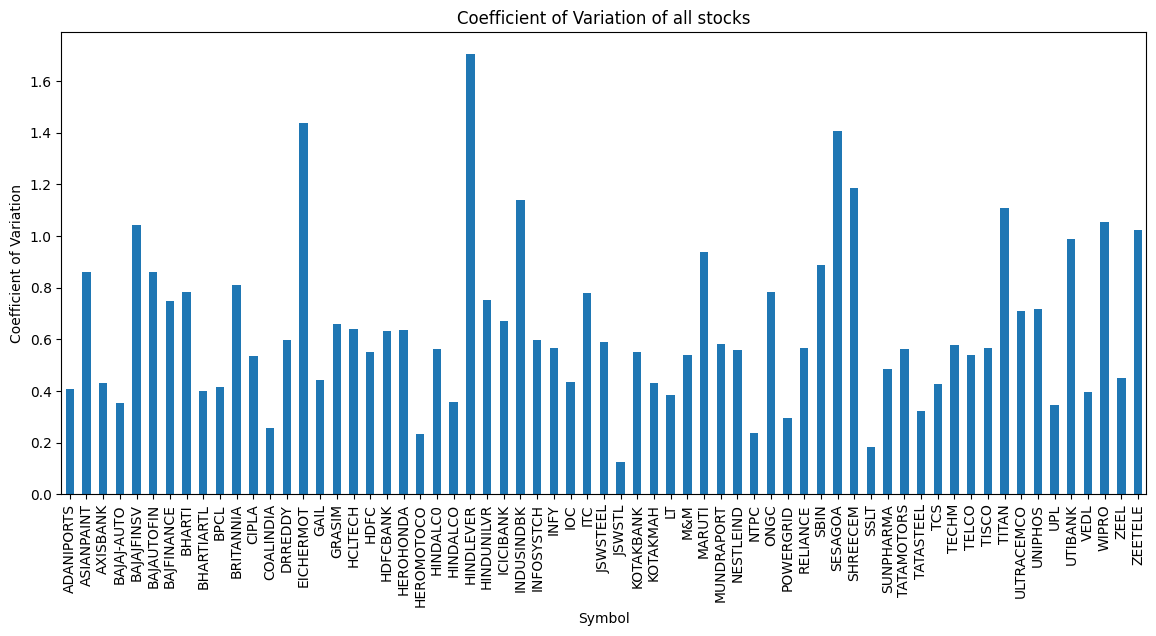

In [ ]:
plt.figure(figsize = (14,6))
Coefficient_of_variation.plot(kind = 'bar', title = 'Coefficient of Variation of all stocks')
plt.ylabel('Coefficient of Variation');

## **Inference**
From the above plot, we can determine the Coefficient of Variation for each stock in the Nifty 50.







## **6. Top 5 highest delivery from 2000-2021.**

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,0.0,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,0.0,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,0.0,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,0.0,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,0.0,816123.0,0.2741


In [ ]:
top_delivolume = df.groupby('Symbol').agg({'Deliverable Volume' : 'sum'}).sort_values(by = ('Deliverable Volume'), ascending = False).head(5)
top_delivolume

,Deliverable Volume
Symbol,
ITC,2.190786e+10
ICICIBANK,2.003433e+10
NTPC,1.580220e+10
SBIN,1.443625e+10
TATAMOTORS,1.314870e+10


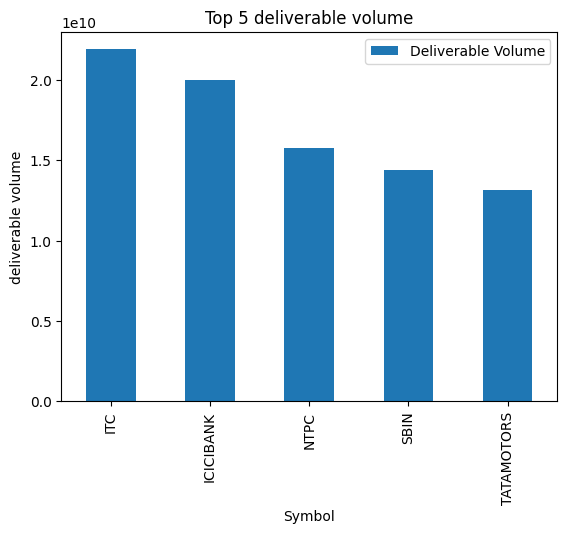

In [ ]:
top_delivolume.plot(kind = 'bar', title = 'Top 5 deliverable volume')
plt.ylabel('deliverable volume');

## **Inference**
The top 5 highest deliverable volume from 2000-2021 are **ITC, ICICI BANK, NTPC , SBIN AND TATA MOTARS.**